In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

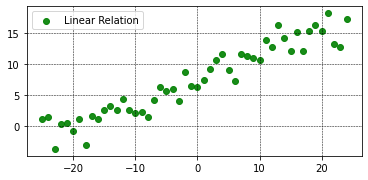

In [ ]:
n = 50
X = np.arange(-n/2,n/2,1,dtype=np.float64)

m = np.random.uniform(0.3,0.5,(n,))
b = np.random.uniform(5,10,(n,))

y = X*m +b 

plt.scatter(X,y,s=None, marker='o',color='g',edgecolors='g',alpha=0.9,label="Linear Relation")
plt.grid(color='black', linestyle='--', linewidth=0.5,markevery=int)
plt.legend(loc=2)
plt.axis('scaled')

plt.show()

In [ ]:
def divide_data(X,y, batch_size):
  chunks = X.shape[0] // batch_size
  X_new = np.array(np.array_split(X, chunks))
  y_new = np.array(np.array_split(y, chunks))
  return X_new, y_new

def predict(X, theta_0, theta_1):
  y_predicted = [(theta_0 + theta_1*point) for point in X]
  return y_predicted

def plot_loss_epochs(loss, epochs):
  plt.plot(np.arange(epochs), list(loss))
  plt.show()

def plot_regression_line(x, y, h_list):
  for h in h_list :
    plt.scatter(X,y)
    plt.plot(X, h)
    plt.xlabel('x')
    plt.ylabel('y')
  plt.show()

def plot_thetas_loss(thetas_0, thetas_1, loss):
  plt.plot(thetas_0, list(loss))
  plt.xlabel('thetas_0')
  plt.ylabel('loss')
  plt.show()
  plt.plot(thetas_1, list(loss))
  plt.xlabel('thetas_1')
  plt.ylabel('loss')
  plt.show()

In [ ]:
def full_batch_gd(X, y, iterations, LEARNING_RATE):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)
    temp_theta_0 = theta_0 - (LEARNING_RATE * (np.sum(distance)/array_length))
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]
    temp_theta_1 = theta_1 - (LEARNING_RATE * (np.sum(theta_1_cost)/array_length))
    theta_0 = temp_theta_0
    theta_1 = temp_theta_1
  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

In [ ]:
def mini_batch_gd(X_batched, y_batched, LEARNING_RATE, iterations):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  for i in range(iterations):
    for X,y in zip(X_batched, y_batched):
      array_length = X.size
      y_predicted = [(theta_0 + theta_1*point) for point in X ]
      distance = y_predicted - y
      squared_distance = [value**2 for value in distance]
      loss = np.sum(squared_distance)
      cost = loss/(2*array_length)
      temp_theta_0 = theta_0 - (LEARNING_RATE * (np.sum(distance)/array_length))
      theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]
      temp_theta_1 = theta_1 - (LEARNING_RATE * (np.sum(theta_1_cost)/array_length))
      theta_0 = temp_theta_0
      theta_1 = temp_theta_1
    losses.append(loss)
    y_preds.append(y_predicted)
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
  return theta_0, theta_1,losses, y_preds, theta_0_list, theta_1_list

In [ ]:
def sgd(X, y, iterations, LEARNING_RATE):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  array_length = X.size
  for i in range(iterations):
    t_0 = theta_0
    t_1 = theta_1
    for point_ind in range(X.size):
      y_predicted = theta_0 + theta_1*X[point_ind]
      distance = y_predicted - y[point_ind]
      squared_distance = distance**2
      cost = (squared_distance)/(2*array_length)
      temp_theta_0 = theta_0 - (LEARNING_RATE * distance)
      temp_theta_1 = theta_1 - (LEARNING_RATE * distance * X[point_ind])
      theta_0 = temp_theta_0
      theta_1 = temp_theta_1
    losses.append(squared_distance)
    y_preds.append(y_predicted)
    theta_0_list.append(t_0)
    theta_1_list.append(t_1)
  return theta_0, theta_1,losses, y_preds, theta_0_list, theta_1_list

In [ ]:
def momentum_gd(X, y, LEARNING_RATE, iterations, gamma):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  theta_temp_0 = 0
  theta_temp_1 = 0
  v_0 = 0
  v_1 = 0
  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)

    gradient_0 = np.sum(distance)/array_length
    temp_theta_0 = (gamma * v_0) + LEARNING_RATE * gradient_0
    v_0 = temp_theta_0
    theta_0 = theta_0 - temp_theta_0
    
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]
    gradient_1 = (np.sum(theta_1_cost)/array_length)
    temp_theta_1 = (gamma * v_1) + (LEARNING_RATE * gradient_1)
    v_1 = temp_theta_1
    theta_1 = theta_1 - temp_theta_1

  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

In [ ]:
BATCH_SIZE=[1, 2, 4, 8, 16]
GAMMA=[.99, .95, .9, .8, .5]
LEARNING_RATE=[0.01, 0.05, 0.01, 0.0025, 0.005]
ITERATIONS=[3, 5, 7, 9, 12]

**Full batch & SGD**

In [ ]:
functions_list=[full_batch_gd, sgd]

<function full_batch_gd at 0x7feb29035c20> with score:  0.2746105571227826 with iterations: 3 and learning rate: 0.01


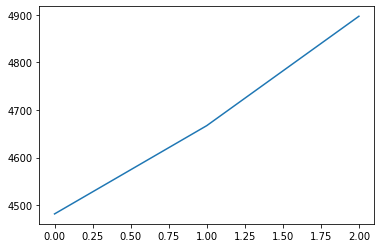

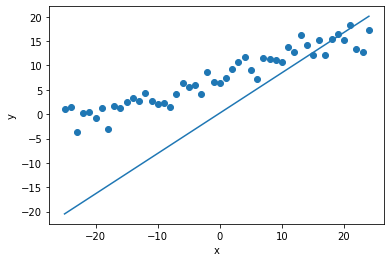

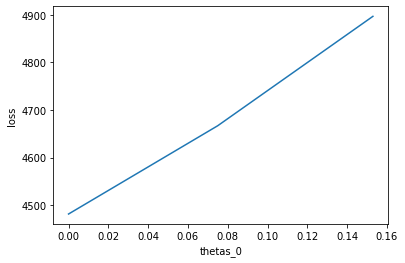

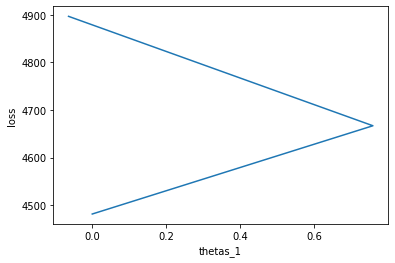

<function sgd at 0x7feb2d11b680> with score:  -0.012968550643424281 with iterations: 3 and learning rate: 0.01


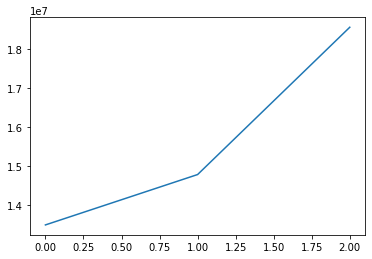

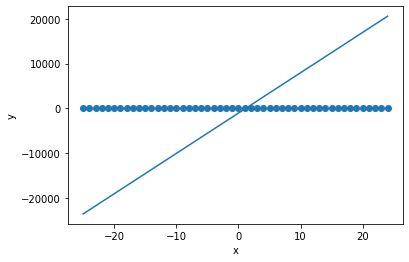

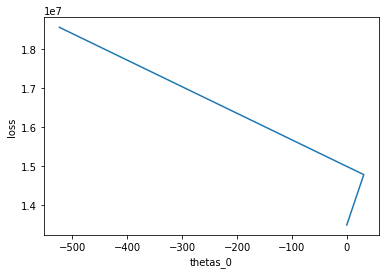

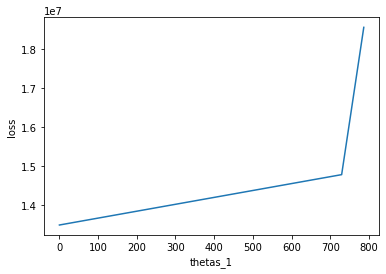

<function full_batch_gd at 0x7feb29035c20> with score:  -0.0011848457608389928 with iterations: 5 and learning rate: 0.05


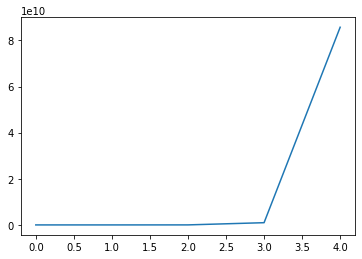

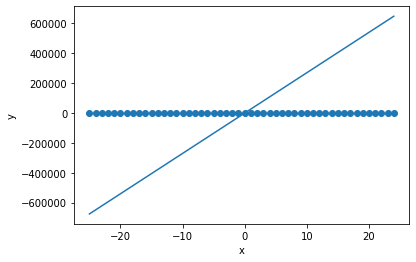

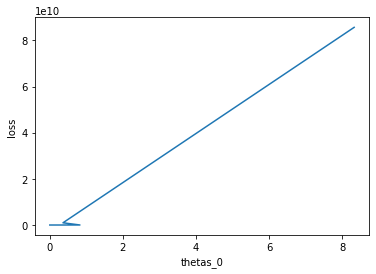

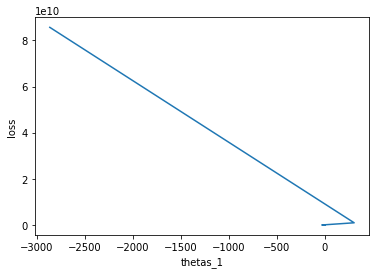

<function sgd at 0x7feb2d11b680> with score:  nan with iterations: 5 and learning rate: 0.05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:594: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:601: RuntimeWarning: invalid value encountered in true_divide
  denominator[valid_score])


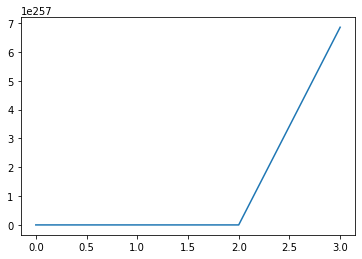

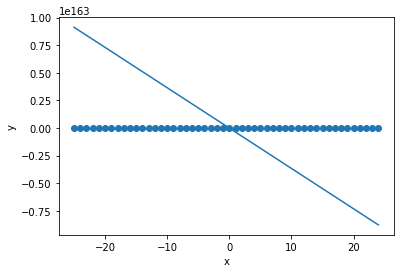

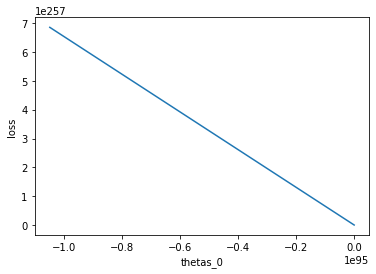

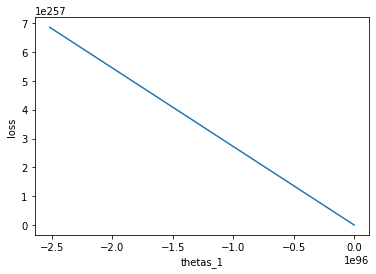

<function full_batch_gd at 0x7feb29035c20> with score:  0.3351436470851241 with iterations: 7 and learning rate: 0.01


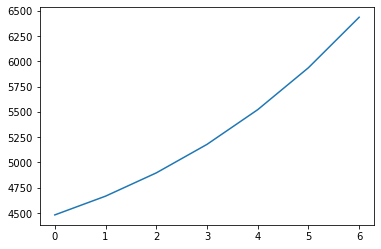

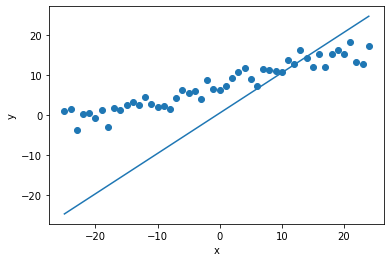

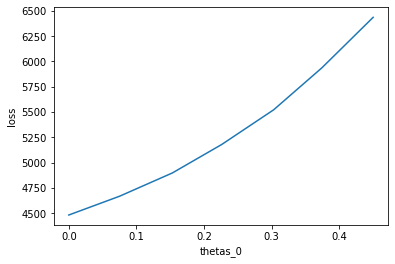

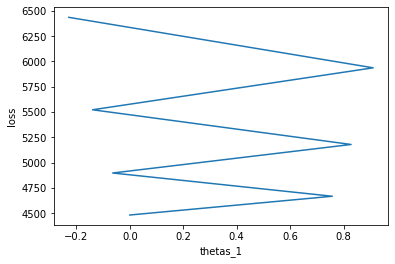

<function sgd at 0x7feb2d11b680> with score:  -0.044758797019032404 with iterations: 7 and learning rate: 0.01


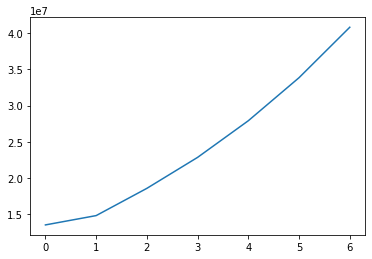

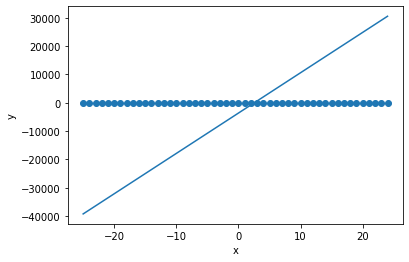

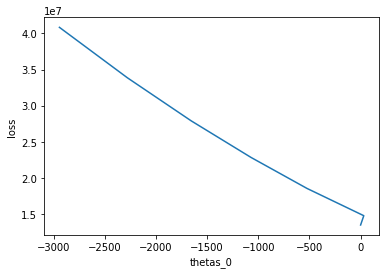

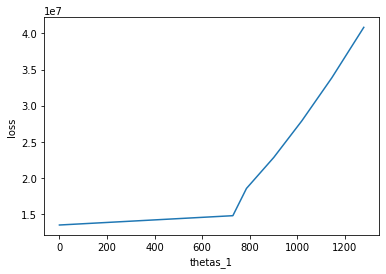

<function full_batch_gd at 0x7feb29035c20> with score:  -1.1653214398421627 with iterations: 9 and learning rate: 0.0025


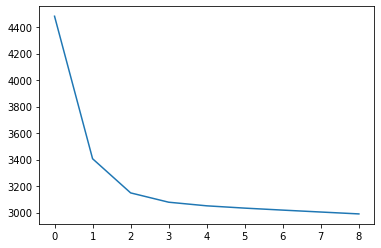

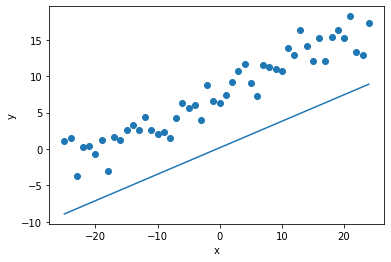

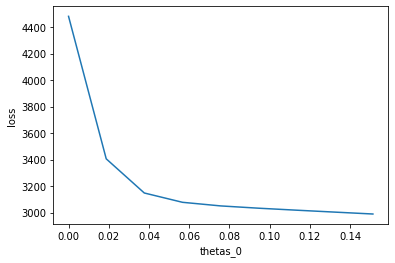

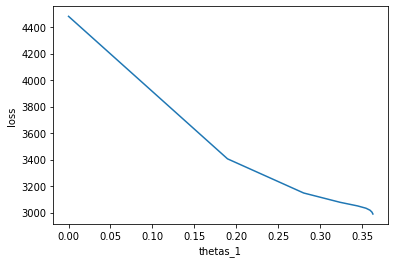

<function sgd at 0x7feb2d11b680> with score:  0.5140166523372283 with iterations: 9 and learning rate: 0.0025


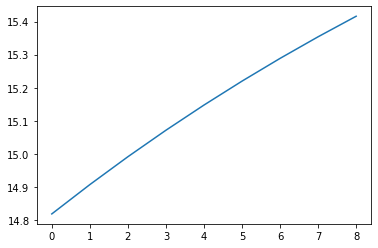

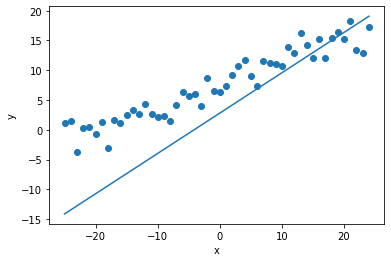

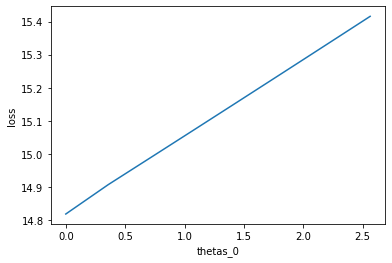

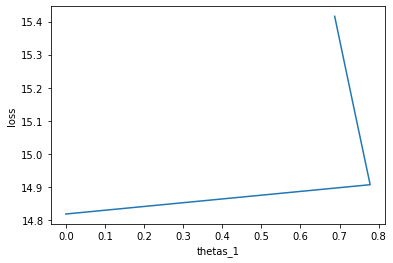

<function full_batch_gd at 0x7feb29035c20> with score:  -1.0039507087936266 with iterations: 12 and learning rate: 0.005


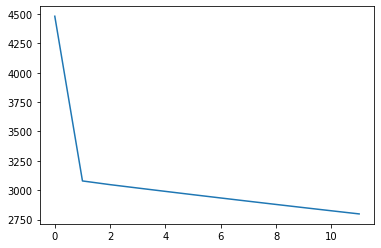

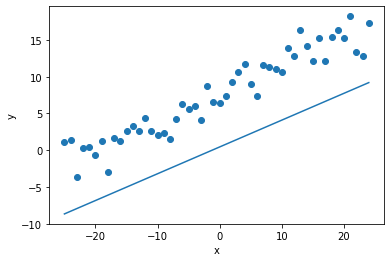

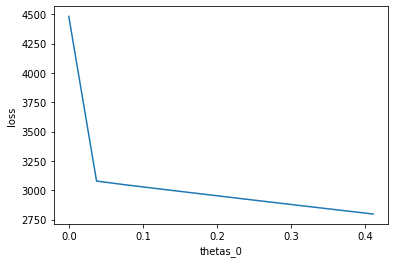

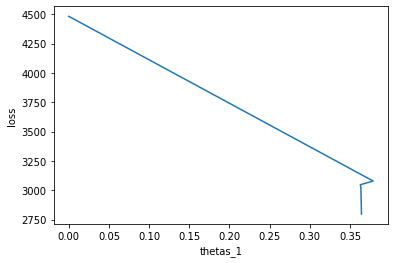

<function sgd at 0x7feb2d11b680> with score:  -2.3836349589148766 with iterations: 12 and learning rate: 0.005


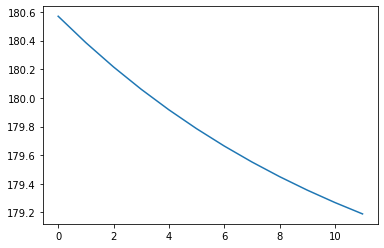

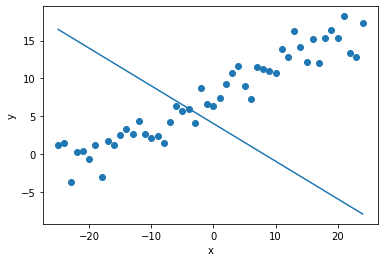

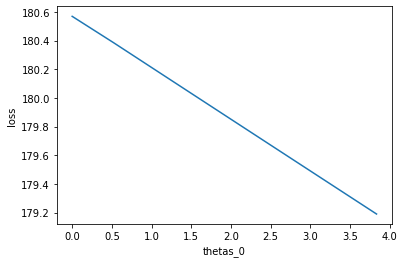

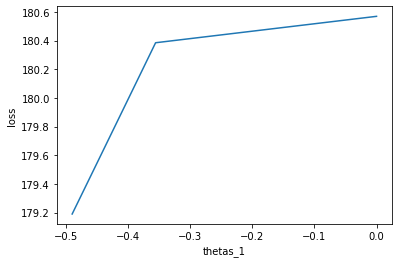

In [ ]:
for i in range(len(ITERATIONS)):
  for function in functions_list:
    new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = function(X, y, ITERATIONS[i], LEARNING_RATE[i])
    y_predicted = predict(X, new_theta_0, new_theta_1)
    print(function, 'with score: ',r2_score(y_predicted, y), f'with iterations: {ITERATIONS[i]} and learning rate: {LEARNING_RATE[i]}')
    plot_loss_epochs(loss_list, ITERATIONS[i])
    plot_regression_line(X,y, list([y_predicted]))
    plot_thetas_loss(thetas_0, thetas_1, loss_list)

**Mini-batch**

with score:  -0.012968550643427168 with iterations: 3 and learning rate: 0.01


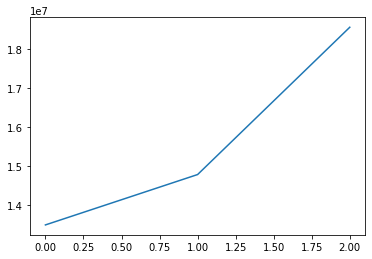

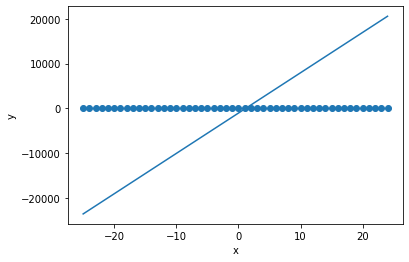

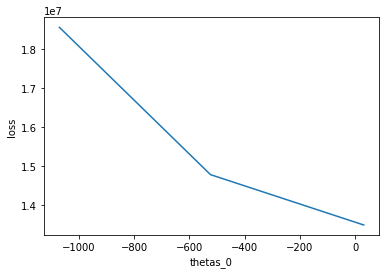

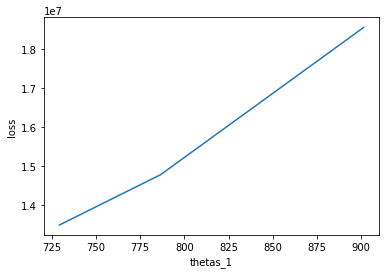

with score:  -0.0010055406853985982 with iterations: 5 and learning rate: 0.05


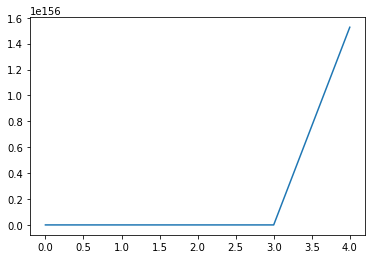

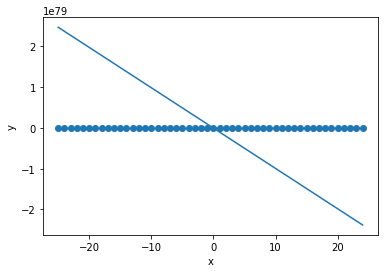

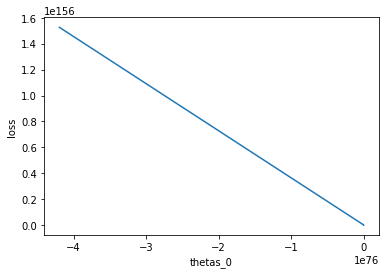

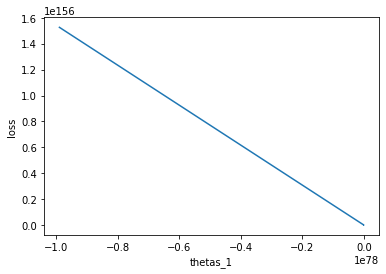

with score:  -215.34167564896134 with iterations: 7 and learning rate: 0.01


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


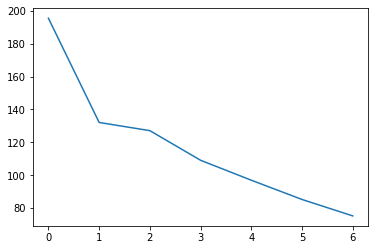

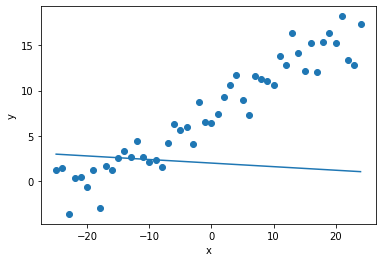

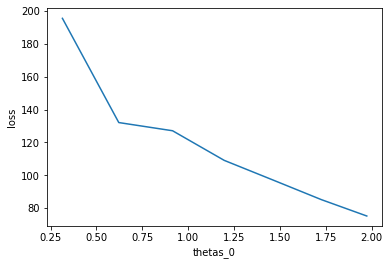

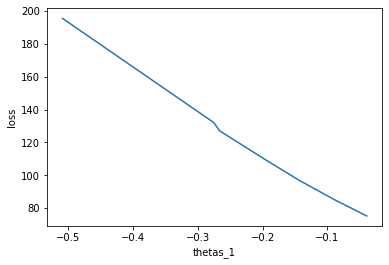

with score:  0.31453392035260785 with iterations: 9 and learning rate: 0.0025


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


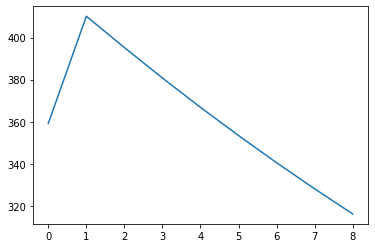

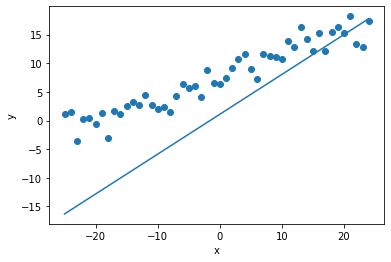

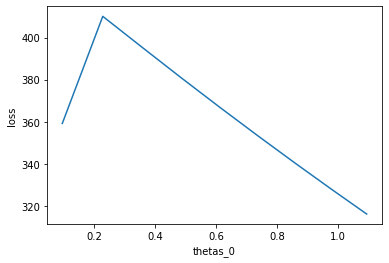

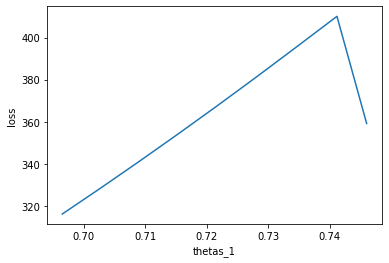

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


with score:  0.4438787393638448 with iterations: 12 and learning rate: 0.005


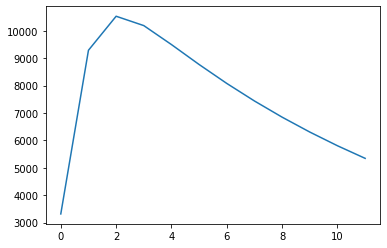

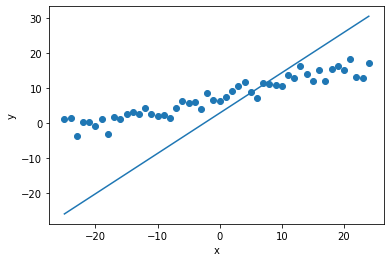

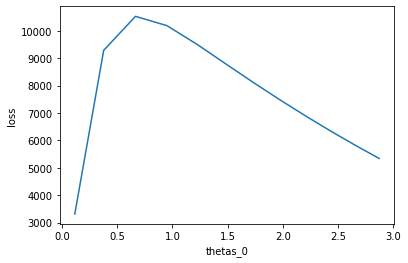

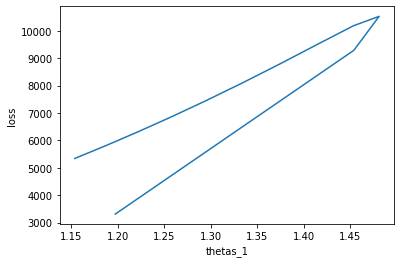

In [ ]:
for i in range(len(ITERATIONS)):
  X_chunked,y_chunked = divide_data(X,y, BATCH_SIZE[i])
  new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1= mini_batch_gd(X_chunked, y_chunked, LEARNING_RATE[i], ITERATIONS[i])
  y_predicted = predict(X, new_theta_0, new_theta_1)
  r2_score(y, y_predicted)
  print('with score: ',r2_score(y_predicted, y), f'with iterations: {ITERATIONS[i]} and learning rate: {LEARNING_RATE[i]}')
  plot_loss_epochs(loss_list, ITERATIONS[i])
  plot_regression_line(X,y, list([y_predicted]))
  plot_thetas_loss(thetas_0, thetas_1, loss_list)

**Momentum & NAG**

In [ ]:
functions_list=[momentum_gd, nag]

<function momentum_gd at 0x7feb2d11bef0> with score:  -137.95758596539488 with iterations: 3 and learning rate: 0.01


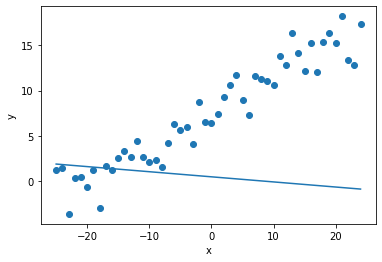

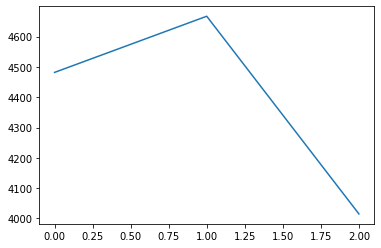

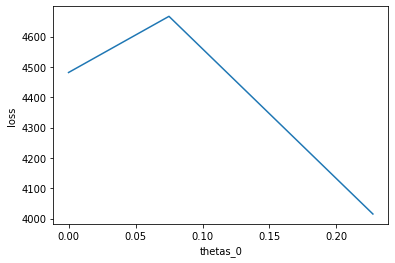

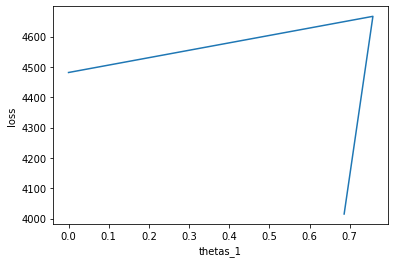

<function nag at 0x7feb2d14f950> with score:  0.17601893858571438 with iterations: 3 and learning rate: 0.01


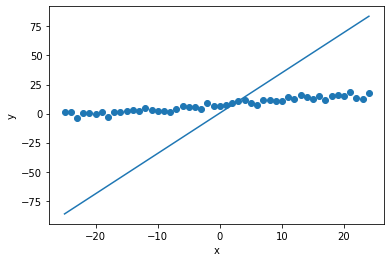

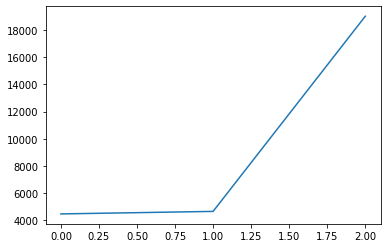

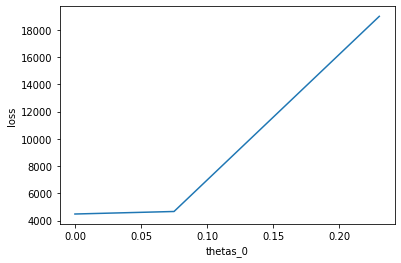

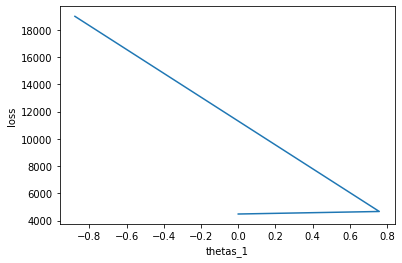

<function momentum_gd at 0x7feb2d11bef0> with score:  -0.0011673058058756514 with iterations: 5 and learning rate: 0.05


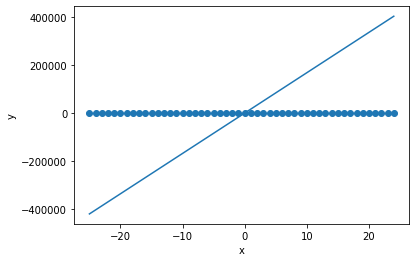

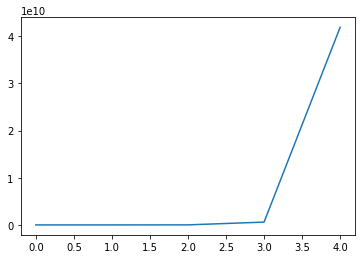

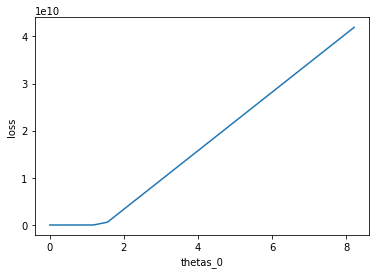

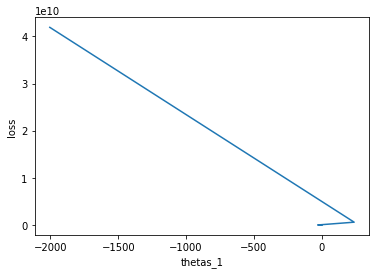

<function nag at 0x7feb2d14f950> with score:  -0.001210388928684969 with iterations: 5 and learning rate: 0.05


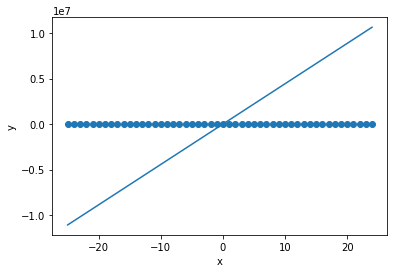

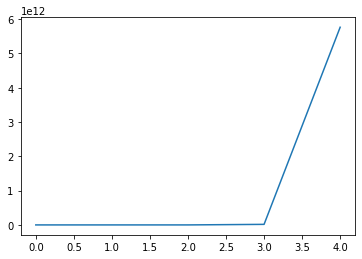

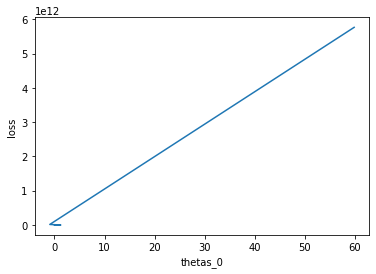

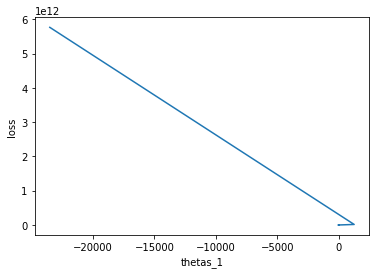

<function momentum_gd at 0x7feb2d11bef0> with score:  -20865.39267765549 with iterations: 7 and learning rate: 0.01


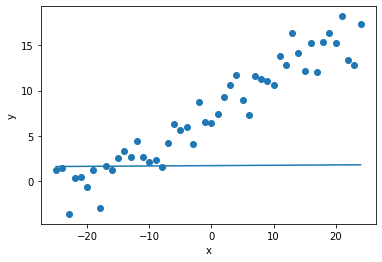

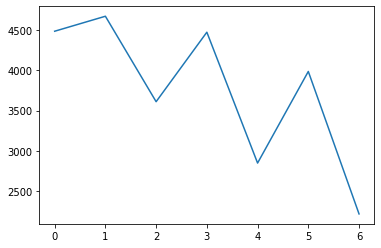

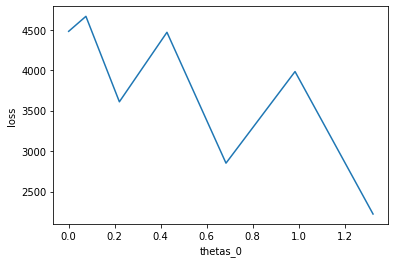

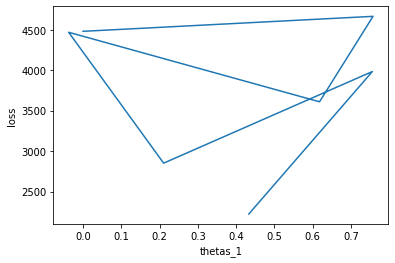

<function nag at 0x7feb2d14f950> with score:  0.005913372835965047 with iterations: 7 and learning rate: 0.01


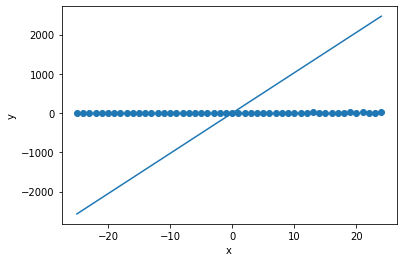

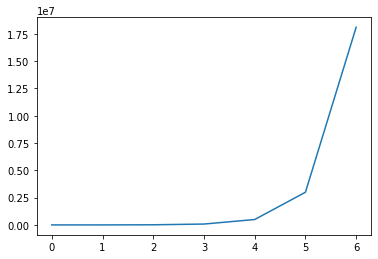

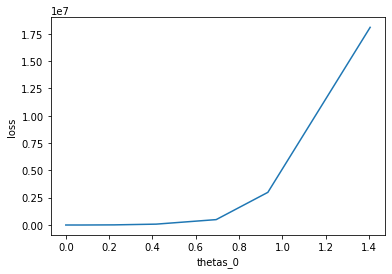

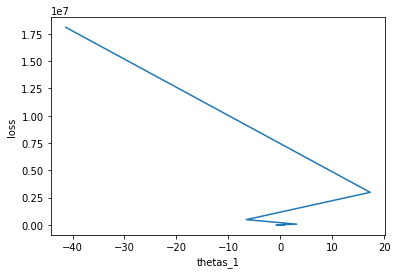

<function momentum_gd at 0x7feb2d11bef0> with score:  -2.3346232565174927 with iterations: 9 and learning rate: 0.0025


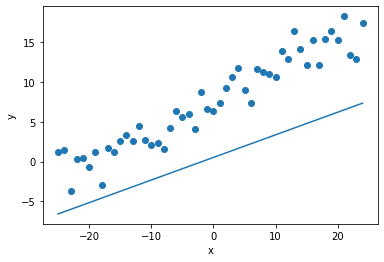

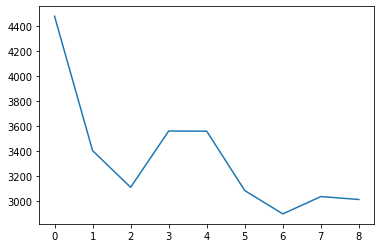

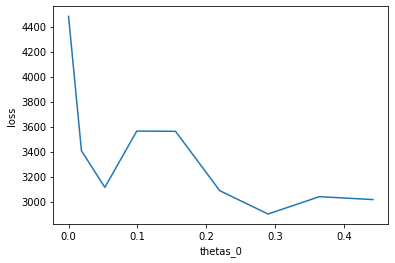

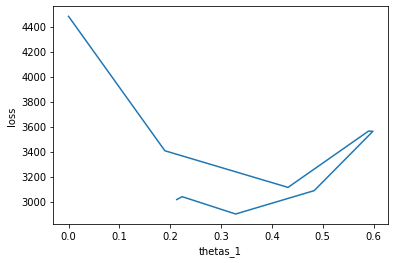

<function nag at 0x7feb2d14f950> with score:  -1.0012566718671256 with iterations: 9 and learning rate: 0.0025


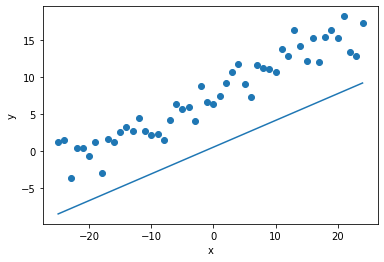

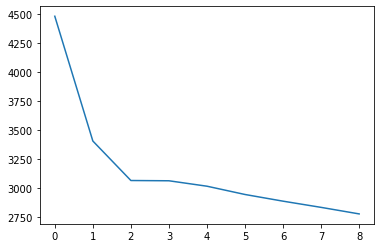

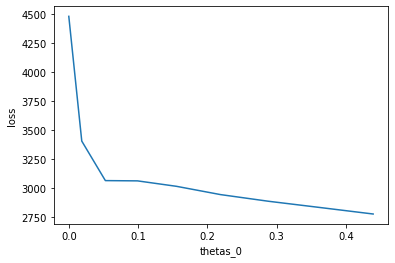

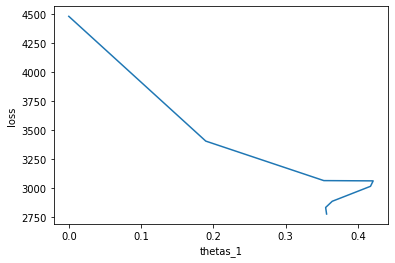

<function momentum_gd at 0x7feb2d11bef0> with score:  -0.7572967058486273 with iterations: 12 and learning rate: 0.005


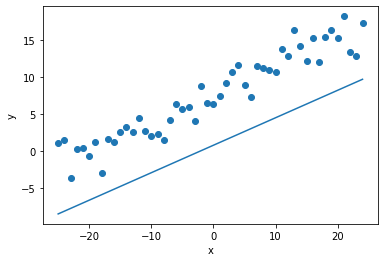

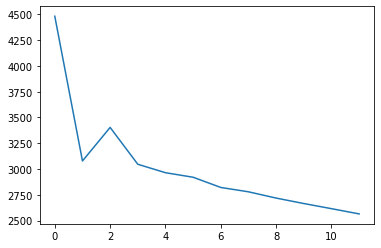

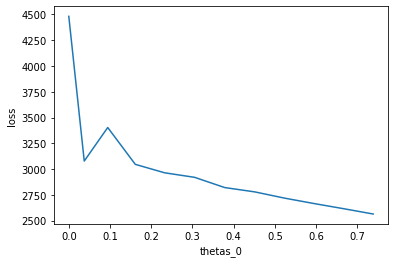

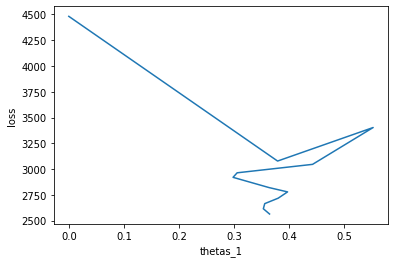

<function nag at 0x7feb2d14f950> with score:  -0.8128019018201724 with iterations: 12 and learning rate: 0.005


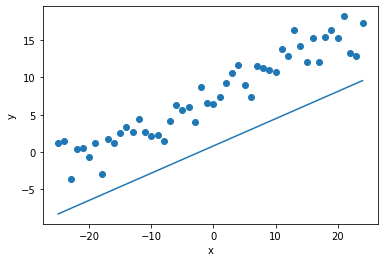

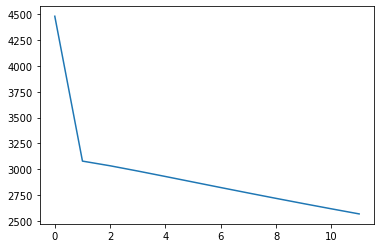

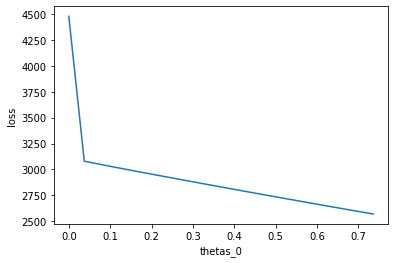

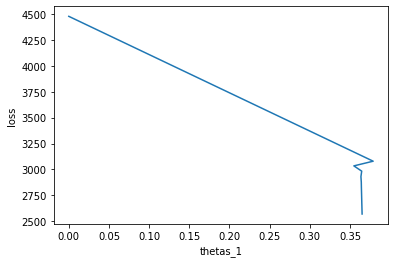

In [ ]:
for i in range(len(ITERATIONS)):
  for function in functions_list:
    new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = function(X,y,LEARNING_RATE[i], ITERATIONS[i], GAMMA[i])
    y_predicted = predict(X, new_theta_0, new_theta_1)
    print(function, 'with score: ',r2_score(y_predicted, y), f'with iterations: {ITERATIONS[i]} and learning rate: {LEARNING_RATE[i]}')
    plot_regression_line(X,y, list([y_predicted]))
    plot_loss_epochs(loss_list, ITERATIONS[i])
    plot_thetas_loss(thetas_0, thetas_1, loss_list)